In [686]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline

In [687]:
data = {
    'normal': {
        'straight': {
            'yellow': {
                'U': [i for i in range(0, 33 + 3, 3)],
                'I': [0.3, 11.3, 14.6, 16.2, 17.2, 17.8, 18.1, 18.5, 18.8, 18.8, 19.0, 19.2]
            }
        },
        'reverse': {
            'yellow': {
                'U': np.round(np.concatenate((np.arange(0.1, 1.0, 0.1), np.arange(1.0, 5.0 + 1.0, 1.0))), 1).tolist(),
                'I': [13.3, 6.5, 2.5, 0.6, -0.1, -0.4, -0.4, -0.4, -0.5, -0.5, -0.5, -0.6, -0.6, -0.6]
            },
            'blue': {
                'U': np.round(np.concatenate((np.arange(0.5, 2.1 + 0.2, 0.2), np.arange(2.5, 5.0 + 0.5, 0.5))), 1).tolist(),
                'I': [1.8, 0.0, -0.4, -0.7, -0.8, -0.8, -0.8, -0.8, -0.8, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9,]
            },
            'without': {
                'U': np.round(np.concatenate((np.arange(1.0, 3.4 + 0.3, 0.3), np.arange(4.0, 5.0 + 0.5, 0.5))), 1).tolist(),
                'I': [17.4, 9.1, 2.6, -1.1, -3.3, -4.4, -4.9, -5.0, -5.1, -5.2, -5.2, -5.3]
            },
        }
    },
    'decreased': {
        'reverse': {
            'yellow': {
                'U': np.round(np.concatenate((np.arange(0.1, 1.0, 0.1), np.arange(1.0, 5.0 + 1.0, 1.0))), 1).tolist(),
                'I': [6.6, 2.6, 1.1, 0.2, 0.0, -0.1, -0.1, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,]
            },
        }
    }
}

In [688]:
# Flattening the dictionary into rows for the table
flattened_data = []

for condition, condition_data in data.items():
    for direction, direction_data in condition_data.items():
        for color, color_data in direction_data.items():
            U_values = color_data['U']
            I_values = color_data['I']
            for U, I in zip(U_values, I_values):
                flattened_data.append({
                    'Condition': condition,
                    'Direction': direction,
                    'Color': color,
                    'U (Voltage)': U,
                    'I (Current)': I
                })

# Creating the DataFrame
df = pd.DataFrame(flattened_data)
df

,Condition,Direction,Color,U (Voltage),I (Current)
0,normal,straight,yellow,0.0,0.3
1,normal,straight,yellow,3.0,11.3
2,normal,straight,yellow,6.0,14.6
3,normal,straight,yellow,9.0,16.2
4,normal,straight,yellow,12.0,17.2
...,...,...,...,...,...
62,decreased,reverse,yellow,1.0,-0.2
63,decreased,reverse,yellow,2.0,-0.2
64,decreased,reverse,yellow,3.0,-0.2
65,decreased,reverse,yellow,4.0,-0.2


In [689]:
def buildSplinePlot(x, y, xname, yname, s, hlineVal = None):
    # Example data: two arrays with equal elements
    x = np.array(x)
    y = np.array(y)

    # Scatter plot of the points
    plt.scatter(x, y, color='blue', label='Data points')

    # Generate x values for plotting the curve
    x_fit = np.linspace(min(x), max(x), 100)

    spline = UnivariateSpline(x, y, s=s)  # s=0 means no smoothing
    y_fit_spline = spline(x_fit)

    # Plot the fitted spline curve
    plt.plot(x_fit, y_fit_spline, color='red')

    if hlineVal is not None:
        plt.axhline(y=hlineVal, color='green', linestyle='--', 
                    label=f'$\\text{{U}}_3 \\approx {hlineVal}$')

    # Add labels and title
    plt.xlabel(xname)
    plt.ylabel(yname)
    
    if s == 1:
        plt.title('Аппроксимация сплайном со сглаживанием')
    elif s == 0:
        plt.title('Аппроксимация сплайном без сглаживания')

    plt.legend()

    # Show the plot
    plt.show()

In [690]:
def buildPolynomialPlot(x, y, xname, yname, degree, hlineVal = None):
    # Example data: two arrays with equal elements
    x = np.array(x)
    y = np.array(y)

    # Scatter plot of the points
    plt.scatter(x, y, color='blue', label='Data points')

    coefficients = np.polyfit(x, y, degree)
    quadratic = np.poly1d(coefficients)

    # Generate y-values based on the fitted line
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = quadratic(x_fit)

    # Plot the fitted line
    plt.plot(x_fit, y_fit, color='red')

    if hlineVal is not None:
        plt.axhline(y=hlineVal, color='green', linestyle='--', 
                    label=f'$\\text{{U}}_3 \\approx {hlineVal}$')

    # Add labels and title
    plt.xlabel(xname)
    plt.ylabel(yname)

    plt.title('Аппроксимация полиномом 6-й степени')

    plt.legend()

    # Show the plot
    plt.show()

In [691]:
def formatList(U, I):
    output =\
f"""
$\\text{{U}} = {U}$\\\\
$\\text{{I}} = {I}$\\\\
"""
    
    print(output)


$\text{U} = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33]$\\
$\text{I} = [0.3, 11.3, 14.6, 16.2, 17.2, 17.8, 18.1, 18.5, 18.8, 18.8, 19.0, 19.2]$\\



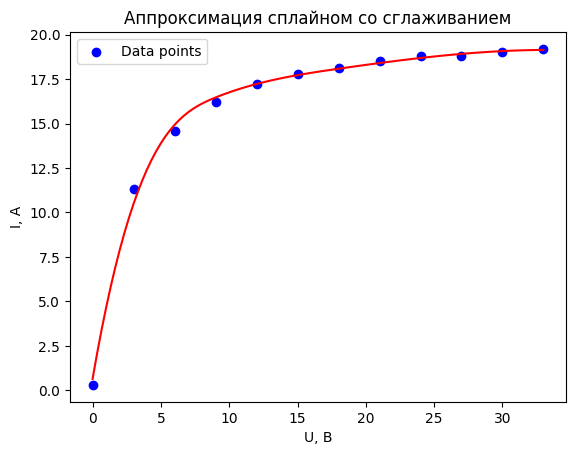

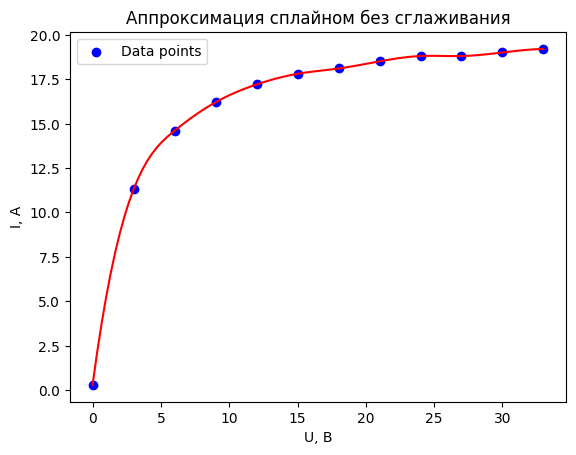

In [692]:
# нормальная прямая желтый

U = data['normal']['straight']['yellow']['U']
I = data['normal']['straight']['yellow']['I']

formatList(U, I)

buildSplinePlot(U, I, 'U, В', 'I, А', 1)
buildSplinePlot(U, I, 'U, В', 'I, А', 0)


$\text{U} = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0]$\\
$\text{I} = [13.3, 6.5, 2.5, 0.6, -0.1, -0.4, -0.4, -0.4, -0.5, -0.5, -0.5, -0.6, -0.6, -0.6]$\\



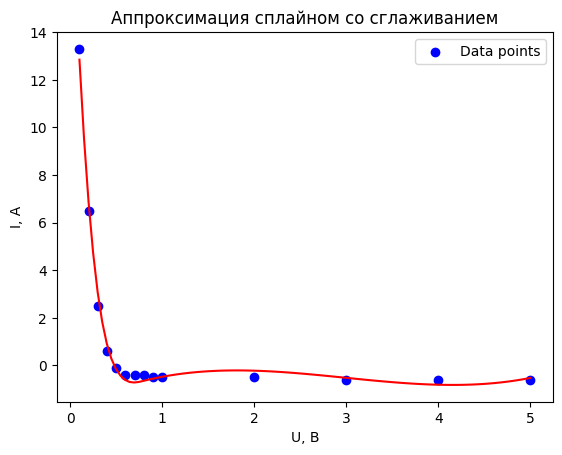


$\text{U} = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0]$\\
$\text{I} = [2.5, 0.6, -0.1, -0.4, -0.4, -0.4, -0.5, -0.5, -0.5, -0.6, -0.6, -0.6]$\\



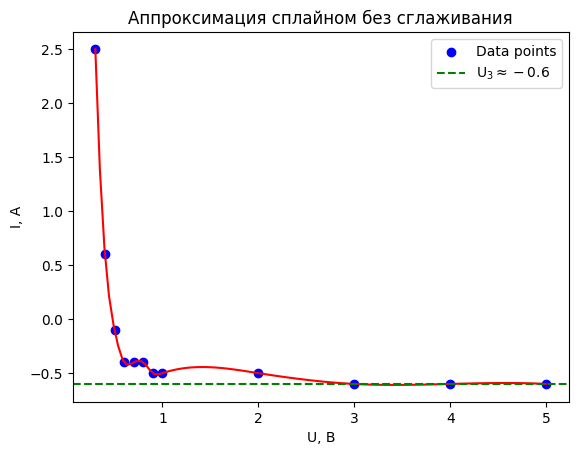

In [693]:
# нормальная обратная желтый

U = data['normal']['reverse']['yellow']['U']
I = data['normal']['reverse']['yellow']['I']

formatList(U, I)

buildSplinePlot(U, I, 'U, В', 'I, А', 1)

U = data['normal']['reverse']['yellow']['U'][2:]
I = data['normal']['reverse']['yellow']['I'][2:]

formatList(U, I)

buildSplinePlot(U, I, 'U, В', 'I, А', 0, -0.6)


$\text{U} = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]$\\
$\text{I} = [1.8, 0.0, -0.4, -0.7, -0.8, -0.8, -0.8, -0.8, -0.8, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9]$\\



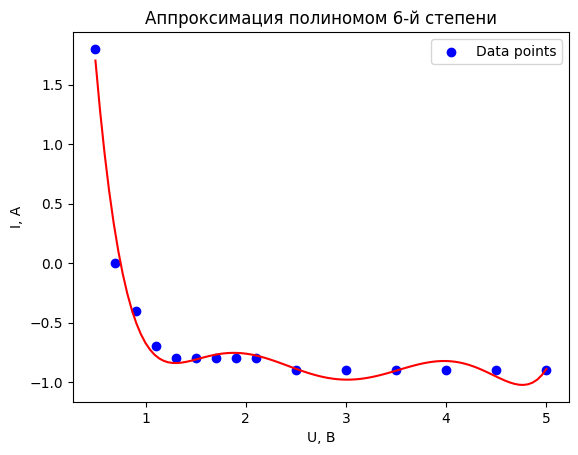


$\text{U} = [0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]$\\
$\text{I} = [0.0, -0.4, -0.7, -0.8, -0.8, -0.8, -0.8, -0.8, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9]$\\



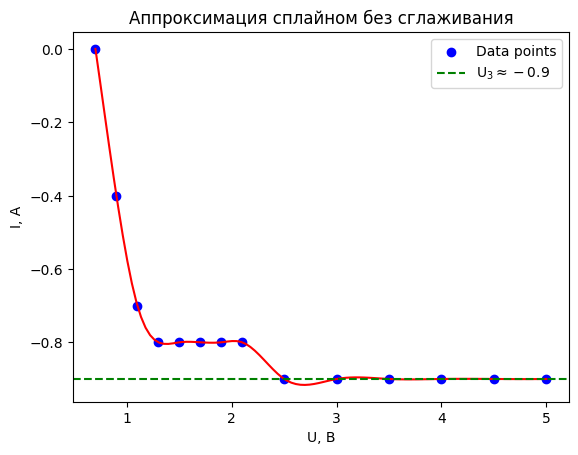

In [694]:
# нормальная обратная синий

U = data['normal']['reverse']['blue']['U']
I = data['normal']['reverse']['blue']['I']

formatList(U, I)

# buildSplinePlot(U, I, 'U, В', 'I, А')
buildPolynomialPlot(U, I, 'U, В', 'I, А', 6)

U = data['normal']['reverse']['blue']['U'][1:]
I = data['normal']['reverse']['blue']['I'][1:]

formatList(U, I)

buildSplinePlot(U, I, 'U, В', 'I, А', 0, -0.9)


$\text{U} = [1.0, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 4.0, 4.5, 5.0]$\\
$\text{I} = [17.4, 9.1, 2.6, -1.1, -3.3, -4.4, -4.9, -5.0, -5.1, -5.2, -5.2, -5.3]$\\



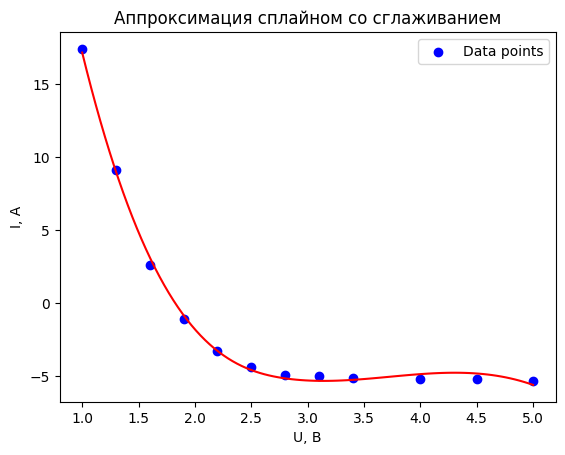


$\text{U} = [1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 4.0, 4.5, 5.0]$\\
$\text{I} = [2.6, -1.1, -3.3, -4.4, -4.9, -5.0, -5.1, -5.2, -5.2, -5.3]$\\



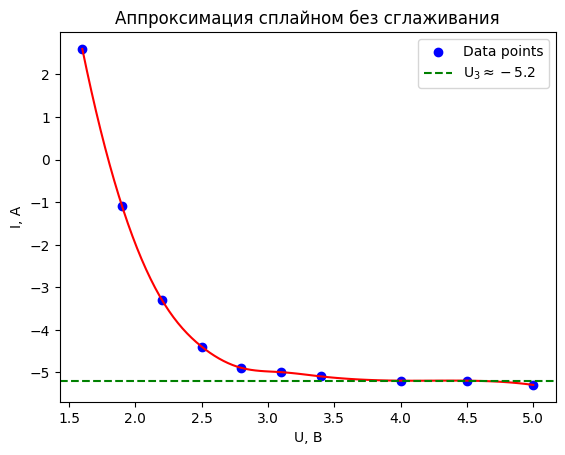

In [695]:
# нормальная обратная без фильтра

U = data['normal']['reverse']['without']['U']
I = data['normal']['reverse']['without']['I']

formatList(U, I)

buildSplinePlot(U, I, 'U, В', 'I, А', 1)

U = data['normal']['reverse']['without']['U'][2:]
I = data['normal']['reverse']['without']['I'][2:]

formatList(U, I)

buildSplinePlot(U, I, 'U, В', 'I, А', 0, -5.2)


$\text{U} = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0]$\\
$\text{I} = [6.6, 2.6, 1.1, 0.2, 0.0, -0.1, -0.1, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2]$\\



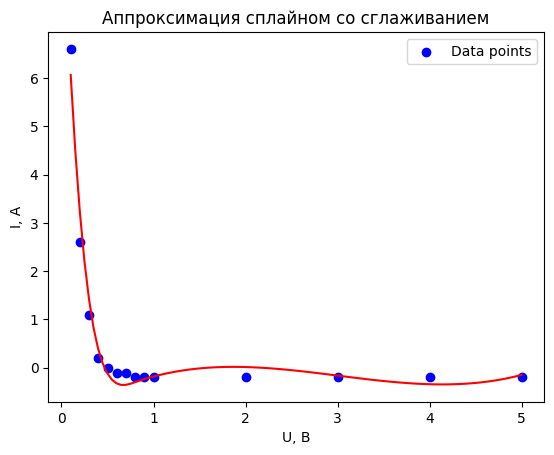


$\text{U} = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0]$\\
$\text{I} = [1.1, 0.2, 0.0, -0.1, -0.1, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2]$\\



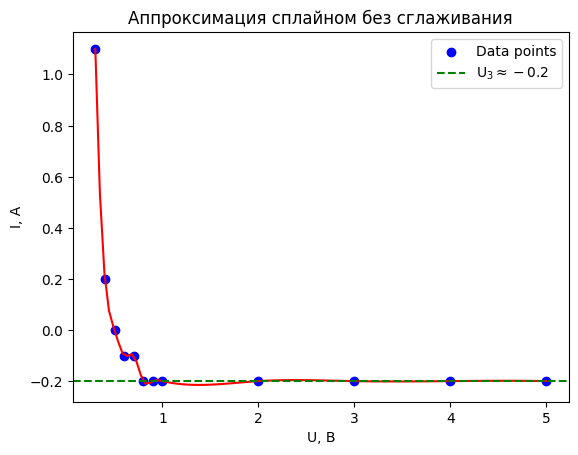

In [696]:
# уменьшенная обратная желтый

U = data['decreased']['reverse']['yellow']['U']
I = data['decreased']['reverse']['yellow']['I']

formatList(U, I)

buildSplinePlot(U, I, 'U, В', 'I, А', 1)

U = data['decreased']['reverse']['yellow']['U'][2:]
I = data['decreased']['reverse']['yellow']['I'][2:]

formatList(U, I)

buildSplinePlot(U, I, 'U, В', 'I, А', 0, -0.2)

In [697]:
def buildLinearPlot(x, y, xname, yname):
    # Example data: two arrays with equal elements
    x = np.array(x)
    y = np.array(y)

    # Scatter plot of the points
    plt.scatter(x, y, color='blue', label='Data points')

    # Fit a straight line through the points (1st degree polynomial)
    coefficients = np.polyfit(x, y, 1)
    slope, intercept = coefficients

    # Generate y-values based on the fitted line
    y_fit = slope * x + intercept

    print(-intercept/slope)

    # Plot the fitted line
    plt.plot(x, y_fit, color='red')

    plt.axhline(y=0, color='green', linestyle='--', 
                label=f'$\\text{{U}}_3 = 0$')

    plt.axvline(x=-intercept/slope, color='green', linestyle='--')

    plt.axvline(x=11.8 * 10**14, color='green', linestyle='--')

    # Add labels and title
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()

    # Adjust the axis limits to zoom out
    # x_padding = (max(x) - min(x)) * 0.5  # 10% padding
    # y_padding = (max(y) - min(y)) * 0.5  # 10% padding
    # plt.xlim([min(x) - x_padding, max(x) + x_padding])
    # plt.ylim([min(y) - y_padding, max(y) + y_padding])

    # Show the plot
    plt.show()

In [698]:
NRY = {'U': 0.6, 'NU': 5.5 * 10**14}
NRB = {'U': 0.9, 'NU': 9.6 * 10**14}
NRW = {'U': 5.2, 'NU': 11.8 * 10**14}

U_NU = [NRY, NRB, NRW]

[5.2, 0.9, 0.6]
[1180000000000000.0, 960000000000000.0, 550000000000000.0]
551336022183009.25


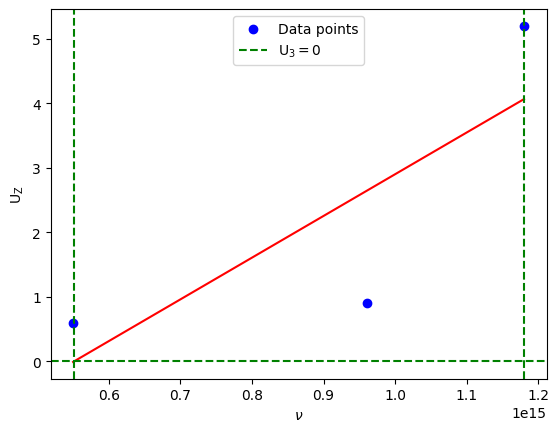

In [699]:
Udata  = [el['U']  for el in U_NU]
NUdata = [el['NU'] for el in U_NU]

print(Udata[::-1])
print(NUdata[::-1])

buildLinearPlot(NUdata, Udata, '$\\nu$', '$\\text{U}_\\text{Z}$')
# buildLinearPlot(Udata, NUdata, f'U', f'NU')